# Анализ оттока клиентов в банке «Метанпром»

## Материалы:

[Презентация](https://disk.yandex.ru/i/Dk953gw3_gLcrA)

[Дашборд](https://public.tableau.com/views/--1-v1_1/Dashboard2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

## Краткая информация о проекте:

Заказчиком является отдел маркетинга банка. Информация нужна менеджеру, который занимается маркетиновыми кампаниями и работает в тесной связке с менеджерами продуктов. Проект направлен на исследование оттока клиентов в банке «Метанпром» с целью выявления факторов, влияющих на уход клиентов, и разработки рекомендаций по их удержанию. В условиях, где привлечение новых клиентов становится все более затратным, понимание факторов и разработка стратегий удержания становятся ключевыми для устойчивого развития банка. Для этого предполагается провести комплексный анализ данных, выделить сегменты клиентов, склонных к оттоку, и предложить рекомендации клиентского удержания.

###  Цели и задачи проекта.

**Цель:**
Провести исследовательский анализ данных для выявления сегментов и значимых признаков отточных клиентов.

**Задачи:**
1. Определение факторов оттока, таких как уровень дохода, активность клиента и количество продуктов, с целью выделения ключевых аспектов, влияющих на решение клиента уйти из банка.
2. Сформулировать и проверить статистические гипотезы, например, о различии дохода между ушедшими и оставшимися клиентами.
3. Сегментация клиентов и разработка рекомендаций для каждого сегмента, позволяющих персонализировать стратегии удержания.
4. Разработать рекомендации по удержанию клиентов для каждого выделенного сегмента.

### План работ:

**1. Загрузка данных и первичный анализ:**

- Импорт необходимых библиотек.
- Загрузка датасета "bank_scrooge.csv".
- Предобработка и первичный анализ данных (поиск дублей, анализ пропусков, проверка названий столбцов и т.п.). Анализ пропусков провести с помощью целых данных и обосновать их заполнение (или нет).
- Проверка/корректировка типов данных
- Кодирование данных с помощью фиктивных переменных для столбца `city`.


**2. Исследовательский анализ данных (EDA):**

- Провести сравнение портретов типичных клиентов, используя средние и медианы для различных признаков.
- Изучить распределения непрерывных признаков, включая их разрез по оттоку.
- Расчитать среднюю долю оттока по банку.
- Оценить уровни оттока по различным категориям (город, пол, наличие кредитной карты и т.д.).
- Провести корреляционный анализ между признаками.


**3. Проверка статистических гипотез:**

- Сформулировать и проверить минимум две статистические гипотезы, связанные с оттоком клиентов (вторую гипотезу сформулировать исходя из сравнения типичных клиентов).


**4. Промежуточный итог:**

- Сделать выводы о том, какие признаки стратегически влияют на отток.
- Определить значения или интервалы этих признаков, связанных с повышенным оттоком.


**5. Сегментация на основе стратегических показателей:**

- Выделить высокоотточные (в 2 раза и выше средней доли по банку) сегменты (минимум 3) клиентов (от 300 до 2000).
- Рассчитать размер и уровень оттока для каждого сегмента.
- Приоритизировать сегменты и обосновать свой выбор.


**6. Выводы и рекомендации:**

- Формулирование общих выводов на основе проведенного анализа.
- Сформулировать конкретные рекомендации для отдела маркетинга и менеджеров продуктов по каждому сегменту.


**7. По итогам исследования подготовить презентацию.**
- Презентация для отдела маркетинга.

### Описание данных

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Рыбинске, Ярославле и Ростове.

Колонки:
- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — приблизительная оценка собственности клиента,
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — был ли клиент активен последнее время,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.

## Загрузка данных и первичный анализ

- Импорт необходимых библиотек.
- Загрузка датасета "bank_scrooge.csv".
- Предобработка и первичный анализ данных (поиск дублей, анализ пропусков, проверка названий столбцов и т.п.). Анализ пропусков провести с помощью целых данных и обосновать их заполнение (или нет).
- Проверка/корректировка типов данных
- Кодирование данных с помощью фиктивных переменных для столбца `city`.

### Импорт необходимых библиотек и настройка jupiter

In [1]:
pip install -U phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from phik import phik_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import missingno as msno

### Загрузка датасета

In [5]:
bank = pd.read_csv('/datasets/bank_scrooge.csv')

### Первичный анализ данных

In [6]:
# Функция получения первичной информации о датафрейме
def first_look (data): 
    print('\033[1m' + '*'*25, 'Первые 5 строк', '*'*25 + '\033[0m') 
    display(data.head()) 
    
    #print('\033[1m' + '---------Случайные 5 строк-----------' + '\033[0m') 
    #display(data.sample(5)) 

    print('\033[1m' + '*'*25, 'Последние 5 строк', '*'*25 + '\033[0m') 
    display(data.tail()) 

    print('\033[1m' + '*'*25, 'Типы данных', '*'*25 + '\033[0m') 
    data.info()

    print('\033[1m' + '*'*25, 'Статистическая сводка', '*'*25 + '\033[0m') 
    display(data.describe()) 

    print('\033[1m' + '*'*25, 'Пропуски', '*'*25 + '\033[0m') 
    display(data.isnull().sum())

    print('\033[1m' + '*'*25, 'Процент пропусков от всего датасета', '*'*25 + '\033[0m')
    display(data.isna().mean().sort_values(ascending=False)*100) 

    print('\033[1m' + '*'*25, 'Дубликаты', '*'*25 + '\033[0m') 
    print('Дубликатов: ', data.duplicated().sum())
    
    print('\033[1m' + '*'*25, 'Уникальные значения в таблице', '*'*25 + '\033[0m')
    display(data.nunique())

In [7]:
first_look(bank)

************************* Первые 5 строк *************************


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


************************* Последние 5 строк *************************


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0
9999,96267,828.0,Рыбинск,Ж,58.0,3,1180886.70,4,0,1,21422.37,0


************************* Типы данных *************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
************************* Статистическая сводка *************************


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


************************* Пропуски *************************


USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

************************* Процент пропусков от всего датасета *************************


balance          22.95
age               0.26
USERID            0.00
score             0.00
city              0.00
gender            0.00
equity            0.00
products          0.00
credit_card       0.00
last_activity     0.00
EST_SALARY        0.00
churn             0.00
dtype: float64

************************* Дубликаты *************************
Дубликатов:  0
************************* Уникальные значения в таблице *************************


USERID           9927
score             348
city                3
gender              2
age                68
equity             10
balance          7701
products            6
credit_card         2
last_activity       2
EST_SALARY       9996
churn               2
dtype: int64

#### Общая информация о датасете:

Датасет содержит 10 000 записей и 12 колонок.

`USERID` - 9927 уникальных значений, присутствуют дублирующиеся строки.
Таблица содержит информации по 3 городам (`city`): Рыбинск, Ярославль и Ростов. 
Клиенты как мужчины так и женщины (`gender`), приблизительная оценка собственности клиента (`equity`) ранжируется от 0 до 9, количество продуктов (`products`) от 0 до 5. 
Баллы кредитного скоринга (`score`), возраст (`age`), баланс на счёте (`balance`), оценочный доход клиента (`EST_SALARY`) весьма разнообразны.
Есть разделение по: `credit_card` (есть ли кредитная карта), `last_activity` (был ли клиент активен последнее время), `сhurn` (признак оттока).

Полные дубликаты отсутствуют.

Необходимо:

- Привести к стилю snake_case наименование колонок: `USERID` и `EST_SALARY`.

- Исследовать пропущенные значения:
    `age` - 26 (0.26 %)
    `balance` - 2295 (22.95 %)

- Изменить тип данных в `score`, `age` на int64, т.к. они содержать только целые значения.

- Исследовать дубликаты по ключевому столбцу `USERID`.

### Предобработка

#### Переименование столбцов

In [8]:
display(bank.columns)

# Приведение имен столбцов к нижнему регистру
bank.columns = bank.columns.str.lower()
# Переименование столбца userid
bank.rename(columns={'userid': 'user_id'}, inplace=True)
### Переименование столбцов
display(bank.columns)

Index(['USERID', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn'],
      dtype='object')

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

#### Пропущенные значения

##### Анализ

In [9]:
# Создадим копию датафрейма
bank_2 = bank.copy()

# Результаты
bank_2.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [10]:
# Создание признаков для отслеживания пропущенных значений
bank_2['age_missing'] = bank_2['age'].isnull().astype(int)
bank_2['balance_missing'] = bank_2['balance'].isnull().astype(int)

# Результаты
bank_2.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_missing,balance_missing
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0


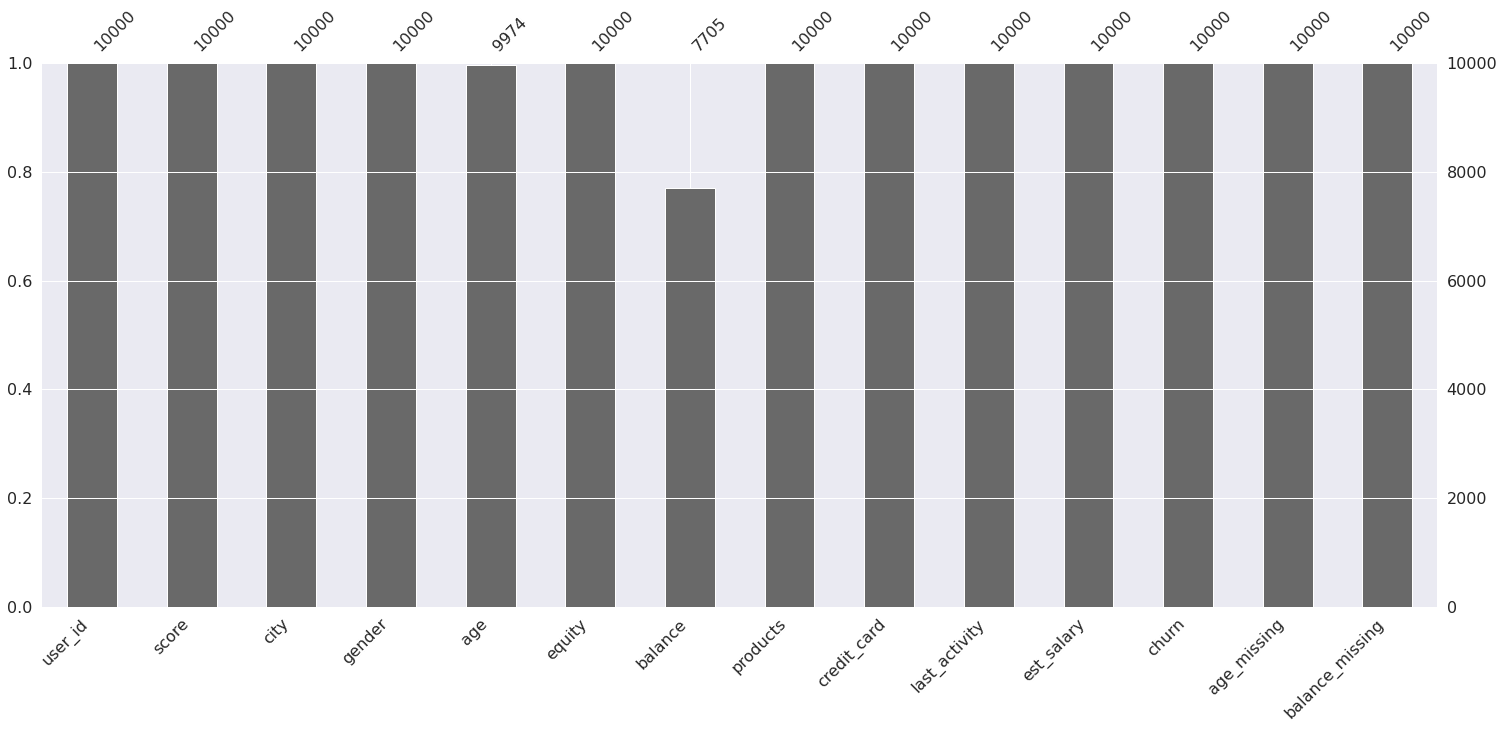

In [11]:
# Расмотрим пропуски с помощью столбчатой диаграммы
# Сделаем стиль графиков seaborn основным
sns.set()
msno.bar(bank_2);

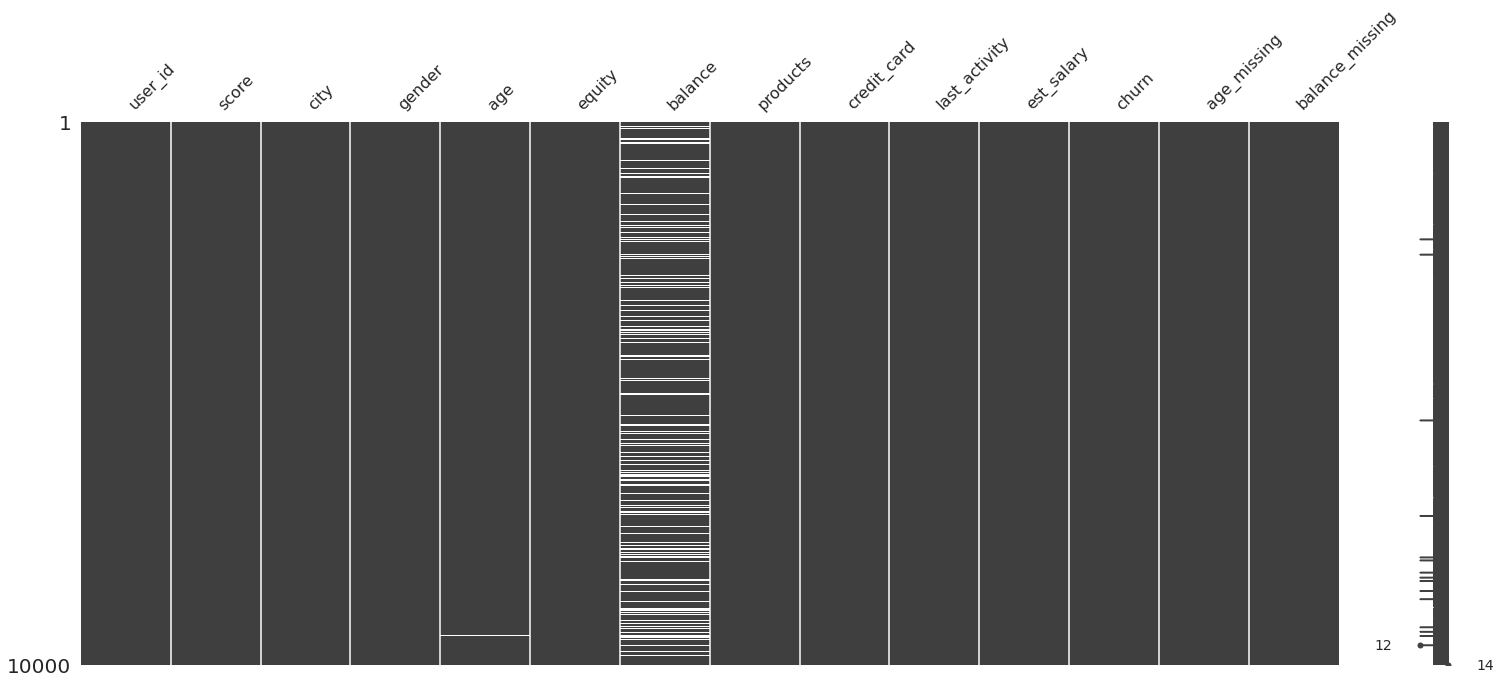

In [12]:
# матрица пропущенных значений 
msno.matrix(bank_2);

Распределение пропущенных значений внутри столбцов с пропусками выглядит случайным, закономерностью были бы пропуски, например, только в первой половине наблюдений.

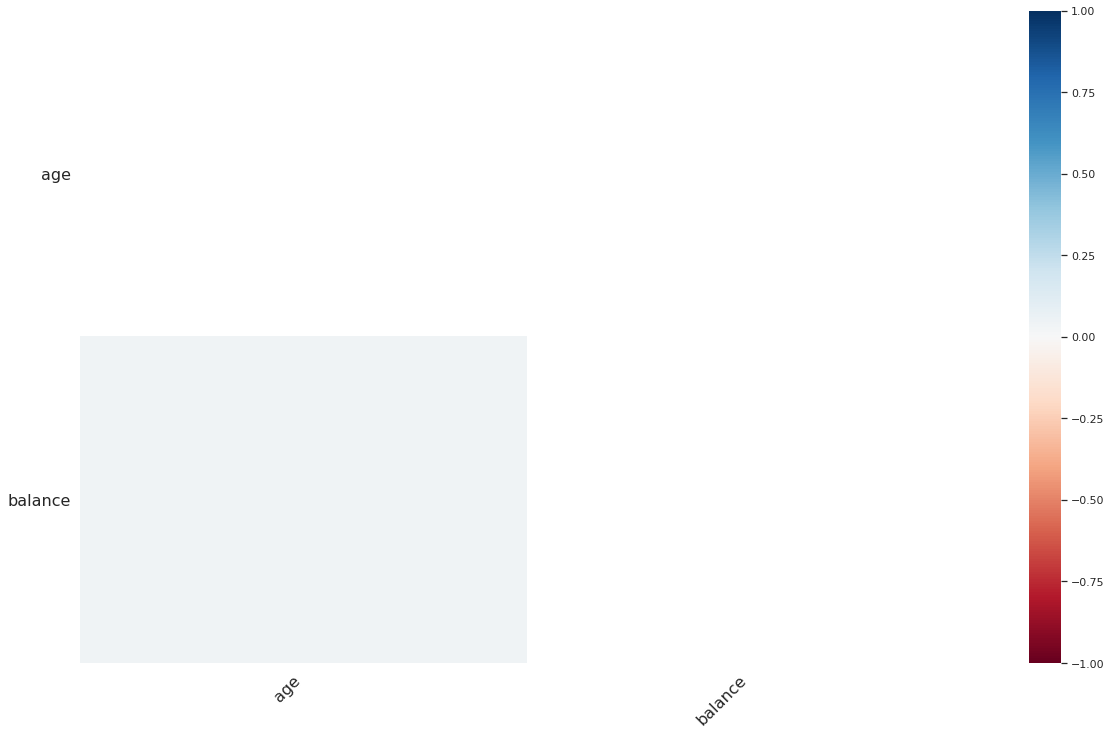

In [13]:
# Корреляция пропущенных значений с помощью тепловой карты (heatmap)
msno.heatmap(bank_2);

Мы видим, что корреляция пропусков близка к нулю для всех признаков. Другими словами, пропуски одного признака не влияют на пропуски другого.

Разделим данные на две группы и посчитаем значения для каждой группы для других переменных. 

Используем медианное значение для числовых данных (`score`, `age`, `balance`, `est_salary`), так как она менее чувствительна к выбросам.

Для категориональных данных (`city`, `gender`, `equity`, `products`, `credit_card`, `last_activity`, `churn`) используем моду - это элемент с максимальной частотой в распределении данных.

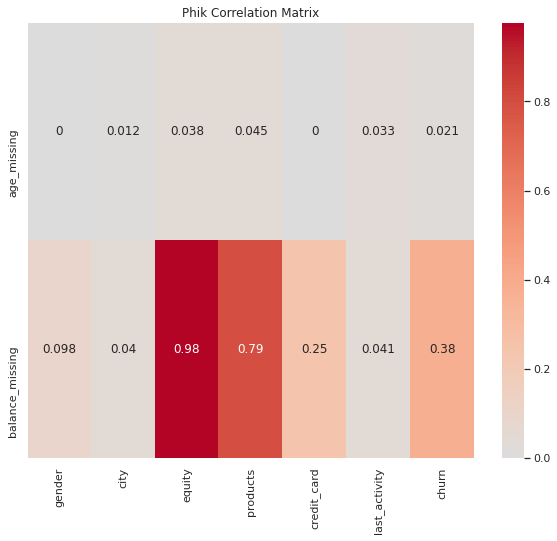

In [14]:
# матрица корреляции phik
# Корреляция пропущенных значений с другими данными
# Выбрать только необходимые столбцы для анализа корреляции
selected_columns = ['gender', 'city', 'equity', 'products', 'credit_card', 'last_activity', 'churn', 'age_missing', 'balance_missing']

# Использовать библиотеку phik для вычисления корреляции, учитывая типы переменных
phik_matrix_result = phik_matrix(bank_2[selected_columns], interval_cols=['age_missing', 'balance_missing'])

# Визуализировать матрицу корреляции phik
plt.figure(figsize=(10, 8))
sns.heatmap(phik_matrix_result.loc[['age_missing', 'balance_missing'], ['gender', 'city', 'equity', 'products', 'credit_card', 'last_activity', 'churn']],
            annot=True, cmap='coolwarm', center=0, xticklabels=selected_columns[:-2], yticklabels=['age_missing', 'balance_missing'])
plt.title('Phik Correlation Matrix')
plt.show()

Пропуски для `age` (возраст) расположены в конце датафрейма в количестве 26 (0.26 %), из анализа следует что нет корреляции с другими данными. Можно предположить, что это тип пропусков MCAR (Missing Completely At Random / Отсутствует совершенно случайно), то есть пропуски отсутствуют случайно и не зависят от значений других переменных. В таком случае, пропуски можно считать случайными и раз их количество невелико, то , можно рассмотреть возможность удаления или заполнения.

Пропуски для `balance` (баланс) расположены случайно в датафрейме в количестве 2295 (22.95 %), из анализа следует что существует корреляция с другими данными. Можно предположить, что это тип пропусков MAR (Missing At Random / Отсутствует случайно) — пропуски случайны в пределах подгрупп данных (групп данных, обусловленных каким-то другим признаком). Таким образом, при обработке пропусков для баланса важно учесть корреляции с другими переменными и, возможно, использовать информацию из этих переменных для заполнения пропусков, как более эффективный и точный способ.

Рассмотрим более подробно взаимосвязь пропусков `balance` и других данных

In [15]:
# Расмотрим взаимосвязь пропусков для `balance` и числовые данные подробнее
bank_2.groupby('balance_missing')[['score', 'est_salary', 'age']].median()

,score,est_salary,age
balance_missing,,,
0,840.0,106222.20,40.0
1,903.0,174160.68,40.0


Расмотрим взаимосвязь пропусков для `balance` и категориальные данные подробнее

In [16]:
# Цикл для создания сводных таблиц для анализа пропущенных значений
for col in ['gender', 'city', 'equity', 'products', 'credit_card', 'last_activity', 'churn']:
    pivot_table_balance = (pd.pivot_table(bank_2, 
                                          values='user_id', 
                                          index='balance_missing', 
                                          columns=col, 
                                          aggfunc='count', 
                                          margins=True, 
                                          margins_name="Total")
                          )
    
    print('\033[1m' + f'\n=== Анализ связи для \'{col}\'===\n' + '\033[0m')
    display(pivot_table_balance)


=== Анализ связи для 'gender'===



gender,Ж,М,Total
balance_missing,,,
0,3982,3723,7705
1,1013,1282,2295
Total,4995,5005,10000



=== Анализ связи для 'city'===



city,Ростов,Рыбинск,Ярославль,Total
balance_missing,,,,
0,1182,2102,4421,7705
1,235,593,1467,2295
Total,1417,2695,5888,10000



=== Анализ связи для 'equity'===



equity,0,1,2,3,4,5,6,7,8,9,Total
balance_missing,,,,,,,,,,,
0,412.0,660.0,1052.0,1542.0,1850.0,1918.0,161.0,80.0,17.0,13.0,7705
1,2180.0,114.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2295
Total,2592.0,774.0,1052.0,1543.0,1850.0,1918.0,161.0,80.0,17.0,13.0,10000



=== Анализ связи для 'products'===



products,0,1,2,3,4,5,Total
balance_missing,,,,,,,
0,NaN,1391.0,4811.0,1010.0,474.0,19.0,7705
1,1.0,1950.0,315.0,29.0,NaN,NaN,2295
Total,1.0,3341.0,5126.0,1039.0,474.0,19.0,10000



=== Анализ связи для 'credit_card'===



credit_card,0,1,Total
balance_missing,,,
0,2773,4932,7705
1,423,1872,2295
Total,3196,6804,10000



=== Анализ связи для 'last_activity'===



last_activity,0,1,Total
balance_missing,,,
0,3731,3974,7705
1,1034,1261,2295
Total,4765,5235,10000



=== Анализ связи для 'churn'===



churn,0,1,Total
balance_missing,,,
0,5898,1807,7705
1,2282,13,2295
Total,8180,1820,10000


In [17]:
# Пропуск, в столбце продукты == 0, рассмотрим подробнее
bank_2[bank_2['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_missing,balance_missing
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,0,1


Количество продуктов, которыми пользуется клиент, равно 0
У данного клиента отсутствуюет кредитная карта. И нет активности. Есть признак оттока.
Остальная информация анкетная или оценочная.

Таким образом можно предположить, что данный клиент закрыл все счета и отказался от услуг нашего банка.

Так как это единственный клиент в данной категории, принимаю решение об удалении этой строки, влияние на данные минимальное.

In [18]:
# Удаление строк, где значение столбца "products" равно 0
bank_2 = bank_2.drop(bank_2[bank_2['products'] == 0].index)

# Проверка
display(bank_2['products'].sort_values().unique())
bank_2.count()

array([1, 2, 3, 4, 5])

user_id            9999
score              9999
city               9999
gender             9999
age                9973
equity             9999
balance            7705
products           9999
credit_card        9999
last_activity      9999
est_salary         9999
churn              9999
age_missing        9999
balance_missing    9999
dtype: int64

Пропуски в балансе не связаны с `gender`, `city`, `last_activity`, так как распределены равномерно.
Однако они имеют определенные зависимости от других переменных, таких категориях как :
`equity` (категории: "0" - 2180 и "1" - 114), 
`products` (категории: "1" - 1950 и "2" - 315),
`credit_card` (категории: "0" - 423 и "1" - 1872), 
`churn` (категории: "0" - 2282 и "1" - 13).

Удалена строка с предположительно полностью отказавшимся от услуг нашего банка клиентом.

##### Заполнение

In [19]:
# Заполните пропуски в столбце "age" медианным значением
bank['age'].fillna(bank['age'].median(), inplace=True)

In [20]:
# Заполните пропуски в столбце "balance"
# Определение условий для фильтрации данных
condition = (bank['equity'] == 0) & (bank['products'] == 1) & (bank['credit_card'] == 1) & (bank['churn'] == 0)

# Выбор значений баланса, соответствующих условиям. Вычисление медианы. Заполнение пропусков.
bank['balance'].fillna(bank.loc[condition, 'balance'].median(), inplace=True)

In [21]:
# Вывод информации о пропущенных значениях после заполнения
bank.isnull().sum()

user_id          0
score            0
city             0
gender           0
age              0
equity           0
balance          0
products         0
credit_card      0
last_activity    0
est_salary       0
churn            0
dtype: int64

##### Проверка влияния обработки пропусков

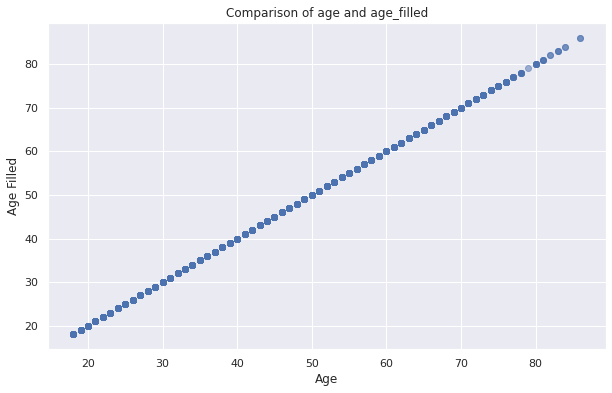

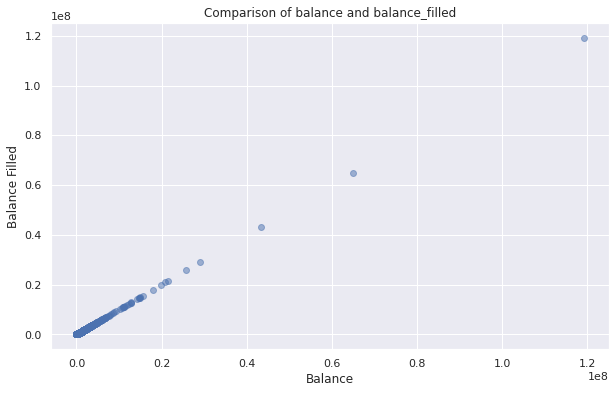

In [22]:
# Что бы размеры таблиц совпадали:
# Удаление строк, где значение столбца "products" равно 0
bank = bank.drop(bank[bank['products'] == 0].index)

# Сравнения значений до заполнения и после
# Создание графика для сравнения 'age' и 'age_filled'
plt.figure(figsize=(10, 6))
plt.scatter(bank_2['age'], bank['age'], alpha=0.5)
plt.title('Comparison of age and age_filled')
plt.xlabel('Age')
plt.ylabel('Age Filled')
plt.grid(True)
plt.show()

# Создание графика для сравнения 'balance' и 'balance_filled'
plt.figure(figsize=(10, 6))
plt.scatter(bank_2['balance'], bank['balance'], alpha=0.5)
plt.title('Comparison of balance and balance_filled')
plt.xlabel('Balance')
plt.ylabel('Balance Filled')
plt.grid(True)
plt.show()

##### Вывод:

Пропуски в столбце `age` (возраст) составляют 0.26 % от всех данных и  не имеют корреляции с другими данными. Оценим тип пропусков как MCAR (Missing Completely At Random / Отсутствует совершенно случайно). В таком случае, пропуски можно считать случайными и раз их количество невелико. Заполнили их медианным значением что бы исключить влияние выбросов.

Пропуски в столбце `balance` (баланс) составляют 22.95 % от всех данных и имеют корреляцию с другими данными. Оценим тип пропусков как MNAR (Missing Not At Random / Отсутствует не случайно). Таким образом, при заполнении пропусков ориентировались на столбцы:
`equity` (категории: "0" - 2180), 
`products` (категории: "1" - 1950),
`credit_card` (категории: "1" - 1872), 
`churn` (категории: "0" - 2282). 
Заполнили их медианным значением что бы исключить влияние выбросов.

Проверка влияния обработки пропусков показала, что точки сосредоточены вдоль диагонали, заполнение пропусков произошло в соответствии с исходными значениями.

Было принято решение об удалении строки с предположительно ушедшим от нас клиентом.

#### Преобразованы типов данных в столбцах

In [23]:
bank[['score', 'age']] = bank[['score', 'age']].astype('int64')

bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9999 non-null   int64  
 1   score          9999 non-null   int64  
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9999 non-null   int64  
 5   equity         9999 non-null   int64  
 6   balance        9999 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1015.5+ KB


#### Не явные дубликаты в user_id

In [24]:
pd.set_option('display.max_rows', None)

# Вывод информации о дубликатах
display(bank[bank.duplicated(subset='user_id', keep=False)].sort_values(by='user_id'))

pd.reset_option('display.max_rows')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7694,116540,887,Ярославль,Ж,38,0,118644.19,1,0,1,119247.61,0
7542,117943,880,Ярославль,Ж,40,0,118644.19,1,1,0,137718.93,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
5896,120258,905,Ярославль,М,30,0,118644.19,1,1,1,146427.96,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
1411,123461,829,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1
8638,123461,934,Рыбинск,М,34,0,118644.19,2,1,0,291619.27,0
8164,124450,859,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1
9775,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0


Дубликаты по столбцу user_id имеют как сходства, так и различия. Различия преобладают, это свидетельствует в пользу ошибки присвоения user_id, поэтому стоит выделить их как уникальных клиентов и присвоить новый номер.

In [25]:
# Создаем новый столбец 'id' и присваиваем уникальные значения
bank['id'] = range(1, len(bank) + 1)

In [26]:
bank

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,id
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,2
2,120722,892,Рыбинск,Ж,30,0,118644.19,1,1,1,107683.34,0,3
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,4
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,9995
9996,139170,894,Ярославль,М,46,0,118644.19,1,1,0,196898.29,0,9996
9997,115639,903,Ярославль,М,24,0,118644.19,2,1,1,108905.09,0,9997
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,9998


#### Кодирование данных с помощью фиктивных переменных для столбца `city`.

In [27]:
# Создадим копию датафрейма
bank_prep = bank.copy()

# Результаты
bank_prep.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,id
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,2
2,120722,892,Рыбинск,Ж,30,0,118644.19,1,1,1,107683.34,0,3
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,4
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,5


In [28]:
# Создайте one-hot кодирование для выбранных столбцов
for column in ['city']:
    # Создайте копию столбца
    bank_prep[column + '_encoded'] = bank_prep[column]
    # Примените one-hot кодирование
    bank_prep = pd.get_dummies(bank_prep, columns=[column + '_encoded'], prefix=[column])

In [29]:
# Обновите названия столбцов в соответствии с вашими ожиданиями
bank_prep.columns = bank_prep.columns.str.replace('city_', '')
bank_prep

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,id,Ростов,Рыбинск,Ярославль
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,2,0,1,0
2,120722,892,Рыбинск,Ж,30,0,118644.19,1,1,1,107683.34,0,3,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,4,0,0,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,9995,0,1,0
9996,139170,894,Ярославль,М,46,0,118644.19,1,1,0,196898.29,0,9996,0,0,1
9997,115639,903,Ярославль,М,24,0,118644.19,2,1,1,108905.09,0,9997,0,0,1
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,9998,0,0,1


In [30]:
# Создайте one-hot кодирование для выбранных столбцов
for column in ['gender']:
    # Создайте копию столбца
    bank_prep[column + '_encoded'] = bank_prep[column]
    # Примените one-hot кодирование
    bank_prep = pd.get_dummies(bank_prep, columns=[column + '_encoded'], prefix=[column])

In [31]:
# Обновите названия столбцов в соответствии с вашими ожиданиями
bank_prep.columns = bank_prep.columns.str.replace('gender_', '')
bank_prep

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,id,Ростов,Рыбинск,Ярославль,Ж,М
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,0,1,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,2,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30,0,118644.19,1,1,1,107683.34,0,3,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,4,0,0,1,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,5,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,9995,0,1,0,0,1
9996,139170,894,Ярославль,М,46,0,118644.19,1,1,0,196898.29,0,9996,0,0,1,0,1
9997,115639,903,Ярославль,М,24,0,118644.19,2,1,1,108905.09,0,9997,0,0,1,0,1
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,9998,0,0,1,1,0


### Вывод:

Датасет содержит 10 000 записей и 12 колонок.

Таблица содержит номер клиента (`user_id`) и информацию по 3 городам (`city`): Рыбинск, Ярославль и Ростов. Клиенты как мужчины так и женщины (`gender`), приблизительная оценка собственности клиента (`equity`) ранжируется от 0 до 9, количество продуктов (`products`) от 0 до 5. Баллы кредитного скоринга (`score`), возраст (`age`), баланс на счёте (`balance`), оценочный доход клиента (`est_salary`) весьма разнообразны. Есть разделение по: `credit_card` (есть ли кредитная карта), `last_activity` (был ли клиент активен последнее время), `сhurn` (признак оттока).

Полные дубликаты отсутствуют.

Наименование столбцов приведено к стилю snake_case.

Произведен анализ, заполнение и проверка влияния обработки пропущенных значений.

Изменить тип данных в `score`, `age` на int64.

Решена проблема с дубликатами по ключевому столбцу user_id. Создан новый столбец `id` с уникальными номерами для каждой строки.

Произведено кодирование данных с помощью фиктивных переменных для столбцов `city` и `gender`.

## Исследовательский анализ данных

Исследовательский анализ данных (EDA):

- Провести сравнение портретов типичных клиентов, используя средние и медианы для различных признаков.
- Изучить распределения непрерывных признаков, включая их разрез по оттоку.
- Расчитать среднюю долю оттока по банку.
- Оценить уровни оттока по различным категориям (город, пол, наличие кредитной карты и т.д.).
- Провести корреляционный анализ между признаками.

### Провести сравнение портретов типичных клиентов, используя средние и медианы для различных признаков.

In [32]:
# Функция для рассчета относительной разницы
def relative_difference(segment1, segment2):
    return ((segment2 - segment1) / segment1) * 100

def calculate_mode(x):
    return x.mode()

# Выбираем только необходимые столбцы для анализа
selected_columns = ['score', 'est_salary', 'age', 'balance', 'city', 'gender', 'equity', 'products', 'credit_card', 'last_activity', 'churn']

# Группировка и агрегация с использованием определенных функций
result = bank_prep[selected_columns].groupby('churn').agg({
    'score': ['median', 'mean'],
    'est_salary': ['median', 'mean'],
    'age': ['median', 'mean'],
    'balance': ['median', 'mean'],
    'city': calculate_mode,
    'gender': calculate_mode,
    'equity': calculate_mode,
    'products': calculate_mode,
    'credit_card': calculate_mode,
    'last_activity': calculate_mode
})

# Рассчет относительной разницы для всех признаков
for feature in ['score', 'est_salary', 'age', 'balance']:
    result[('Относительная разница среднего', feature)] = relative_difference(
        result[(feature, 'mean')].loc[1], result[(feature, 'mean')].loc[0]
    )

# Вывод результата
result.round(1)

score        est_salary              age         balance             \
      median   mean     median      mean median  mean    median       mean   
churn                                                                        
0        848  845.4   118257.7  147783.2     40  43.0  320687.9   562319.7   
1        866  863.3   125395.2  148310.7     39  41.4  775365.2  1127295.0   

                city         gender         equity       products  \
      calculate_mode calculate_mode calculate_mode calculate_mode   
churn                                                               
0          Ярославль              Ж              0              2   
1          Ярославль              М              5              2   

         credit_card  last_activity Относительная разница среднего             \
      calculate_mode calculate_mode                          score est_salary   
churn                                                                           
0                  1              0                           -2.1       -0.4   
1                  1              1                           -2.1       -0.4   

                    
       age balance  
churn               
0      3.8   -50.1  
1      3.8   -50.1

Использование для непрерывных величин медианы в дополнение к среднему, обусловлено тем, чтобы понимать, в какой сторону смещено распределение (указанно в скобках).

По итогам анализа можно выделить портрет клиента по центральным тендецниям, с признаками оттока и без:

Портрет клиента без признаков оттока
- Пол: женский
- Возраст: 43 (40)
- Город: Ярославль
- Оценочный доход: 147 783.2 (118 257.7)
- Баланс на счёте: 562 319.7 (320 687.9)
- Оценка объектов собственности: 0
- Скоринговый рейтинг: 845 (848)
- Количество используемых продуктов: 2
- Наличие кредитной карты: да
- Пользовательская активность: нет


Портрет клиента с признаками оттока
- Пол: мужской
- Возраст: 41 (39)
- Город: Ярославль
- Оценочный доход: 148 243.0 (125 390.6)
- Баланс на счёте: 1 126 740.8 (775 349.2)
- Оценка объектов собственности: 5
- Скоринговый рейтинг: 863 (866)
- Количество используемых продуктов: 2
- Наличие кредитной карты: да
- Пользовательская активность: да


Относительная разница среднего показывает отношение среднего значения не отточных клиентов к отточным. В данном сегменте выделяется разница в балансе. Баланс клиентов без признаков оттока на 50.1 % меньше от отточных клиентов.

Так же явные различия наблюдаются в поле, оценке объектов собственности и пользовательской активности.

### Расчитать среднюю долю оттока по банку.

In [33]:
# Выводим результат
print('Средняя доля оттока по банку:', bank_prep['churn'].mean() * 100, '%')

Средняя доля оттока по банку: 18.19181918191819 %


### Изучить распределения непрерывных признаков, включая их разрез по оттоку.

Непрерывные признаки находятся в столбцах `score`, `age`, `balance`, `est_salary`.

Очистим данные от выбросов (больших значений) только для 'balance' и 'est_salary' для лучшей визуализации данных.

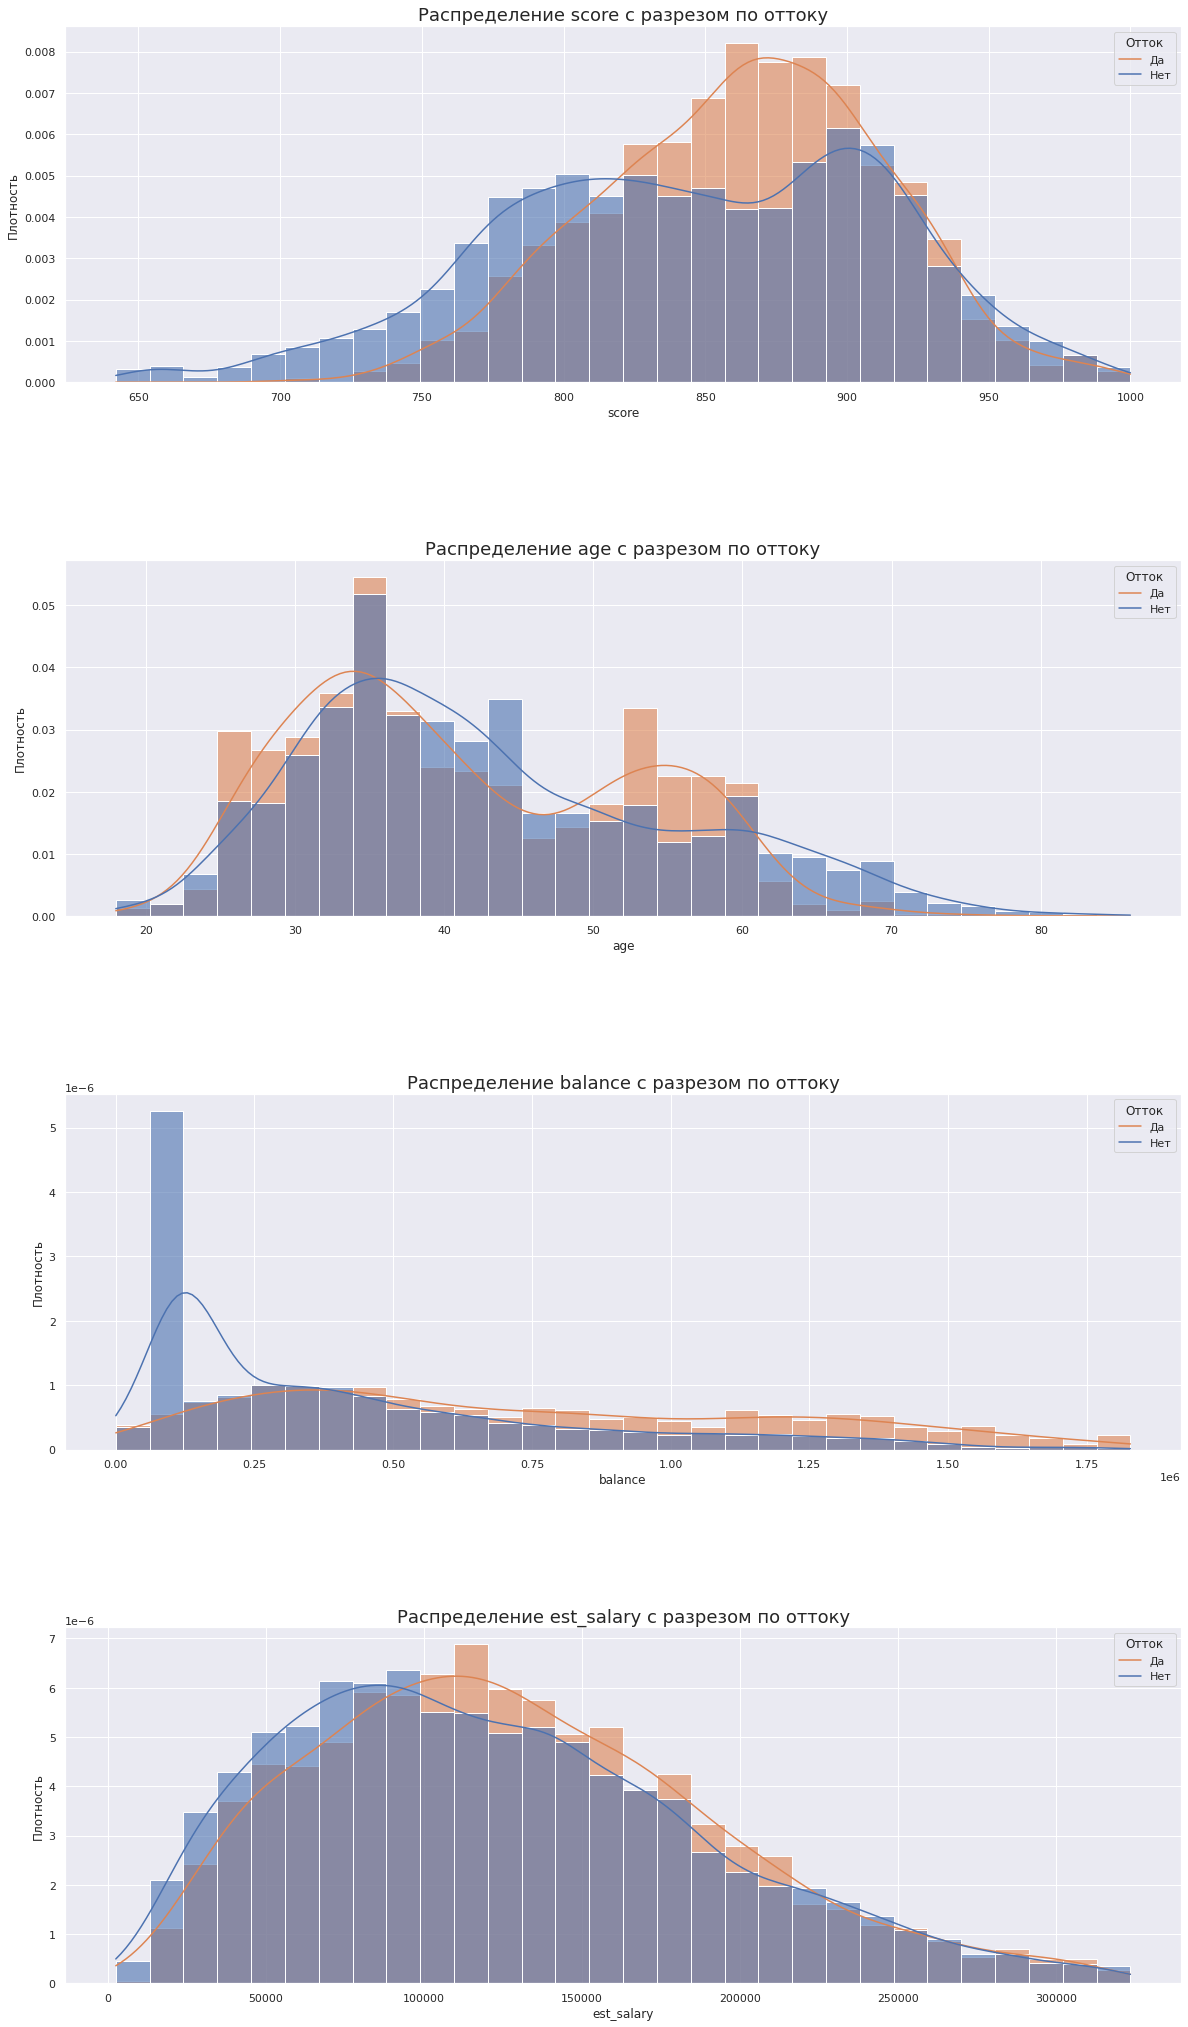

In [34]:
# Выбранные столбцы для анализа
selected_columns = ['score', 'age', 'balance', 'est_salary', 'churn']

# Создаем подмножество DataFrame с выбранными столбцами
data_subset = bank_prep[selected_columns].copy()

# Функция для определения выбросов с использованием IQR
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Очищаем данные от выбросов только для 'balance' и 'est_salary'
for column in ['balance', 'est_salary']:
    data_subset[column] = remove_outliers(data_subset[column])

# Создаем фигуру и оси для графиков
fig, axes = plt.subplots(nrows=len(selected_columns) - 1, ncols=1, figsize=(20, 36))
fig.subplots_adjust(hspace=0.5)

# Итерируем по выбранным непрерывным признакам
for i, feature in enumerate(selected_columns[:-1]):
    ax = axes[i]

    # Строим гистограмму с разбивкой по оттоку
    sns.histplot(data=data_subset, 
                 x=feature, 
                 hue='churn', 
                 stat="density", 
                 common_norm=False, 
                 kde=True, 
                 ax=ax, 
                 bins=30, 
                 alpha=0.6)
    
    ## Добавляем пунктирную линию для средней доли оттока по банку
    #mean_churn = data_subset['churn'].mean()
    #ax.axhline(y=mean_churn, color='red', linestyle='--', label='Средняя доля оттока по банку')

    # Устанавливаем заголовок и подписи к осям
    ax.set_title(f'Распределение {feature} с разрезом по оттоку', fontsize=18)
    ax.set_xlabel(feature)
    ax.set_ylabel('Плотность')
    ax.legend(title='Отток', labels=['Да', 'Нет'])

# Показываем график
# После цикла добавьте следующую строку
plt.show()

Средняя доля оттока по банку: 18.2 % значительно больше, чем в данных категориях.

Распределение `score` с разрезом по оттоку, можем выделить следующие диапазоны (по оттоку):
- от 820 до 899
- от 920 до 939

Однако граница не явная, при сегментации стоит рассматривать вместе, но выделить было необходимо. 

Распределение `age` с разрезом по оттоку, можем выделить следующие диапазоны (по оттоку):
- от 25 до 35
- от 50 до 60

Распределение `balance` с разрезом по оттоку, можем выделить следующие диапазоны (по оттоку):
- от 450 000 +

Распределение `est_salary` с разрезом по оттоку, можем выделить следующие диапазоны (по оттоку):
- от 100 000 до 215 000
- от 275 000 до 310 000

### Оценить уровни оттока по различным категориям (город, пол, наличие кредитной карты и т.д.).

Средняя доля оттока по банку: 0.18

=== Процент оттока для 'gender'===



gender
Ж    0.13
М    0.24
Name: churn, dtype: float64

gender,Ж,М,Total
churn,,,
0,4358,3822,8180
1,636,1183,1819
Total,4994,5005,9999


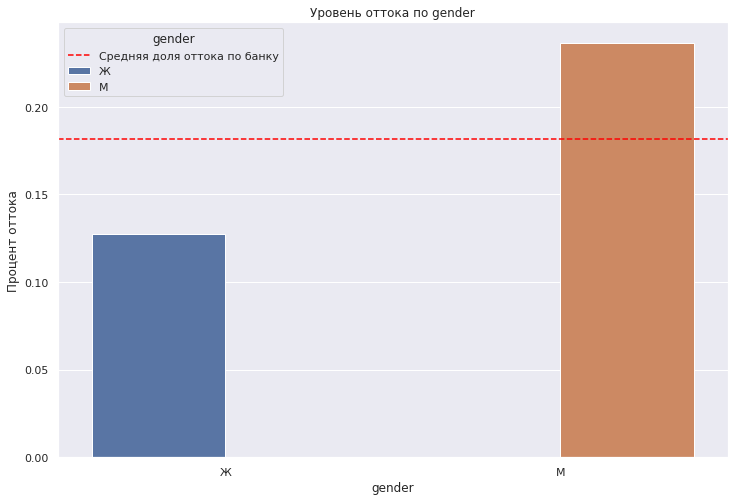


=== Процент оттока для 'equity'===



equity
0    0.03
1    0.12
2    0.16
3    0.21
4    0.25
5    0.30
6    0.36
7    0.46
8    0.35
9    0.54
Name: churn, dtype: float64

equity,0,1,2,3,4,5,6,7,8,9,Total
churn,,,,,,,,,,,
0,2502,681,886,1221,1386,1341,103,43,11,6,8180
1,90,93,166,321,464,577,58,37,6,7,1819
Total,2592,774,1052,1542,1850,1918,161,80,17,13,9999


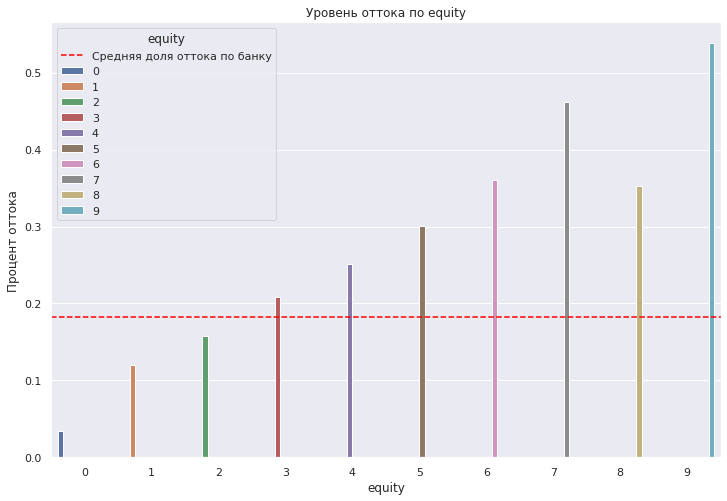


=== Процент оттока для 'products'===



products
1    0.07
2    0.19
3    0.29
4    0.63
5    0.42
Name: churn, dtype: float64

products,1,2,3,4,5,Total
churn,,,,,,
0,3106,4147,742,174,11,8180
1,235,979,297,300,8,1819
Total,3341,5126,1039,474,19,9999


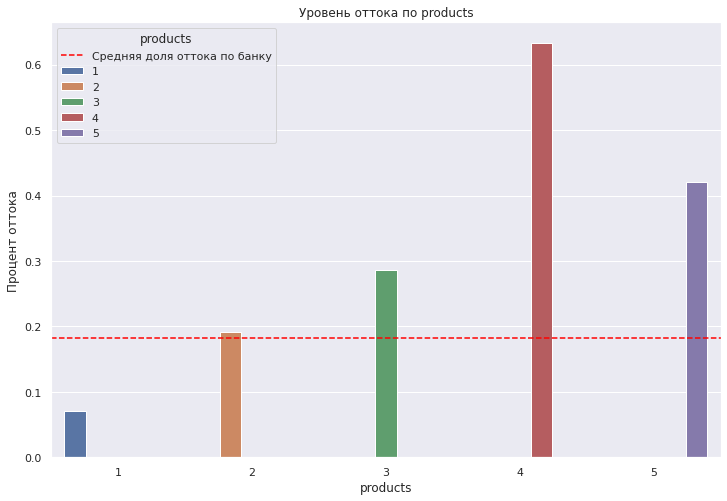


=== Процент оттока для 'last_activity'===



last_activity
0    0.11
1    0.24
Name: churn, dtype: float64

last_activity,0,1,Total
churn,,,
0,4223,3957,8180
1,541,1278,1819
Total,4764,5235,9999


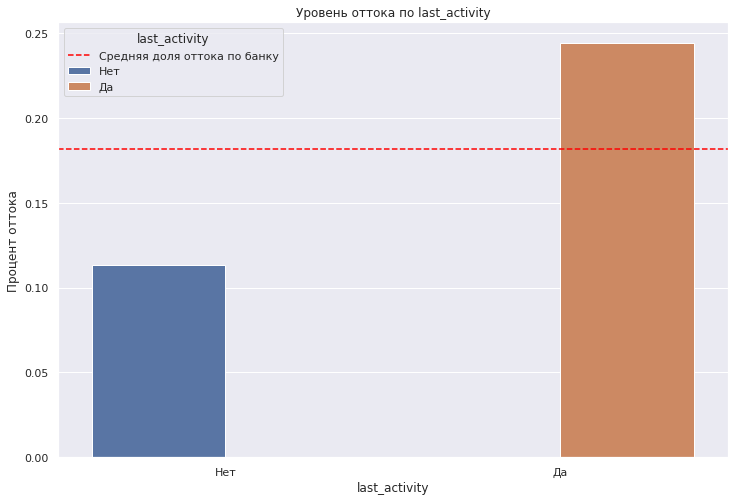


=== Процент оттока для 'credit_card'===



credit_card
0    0.26
1    0.15
Name: churn, dtype: float64

credit_card,0,1,Total
churn,,,
0,2379,5801,8180
1,816,1003,1819
Total,3195,6804,9999


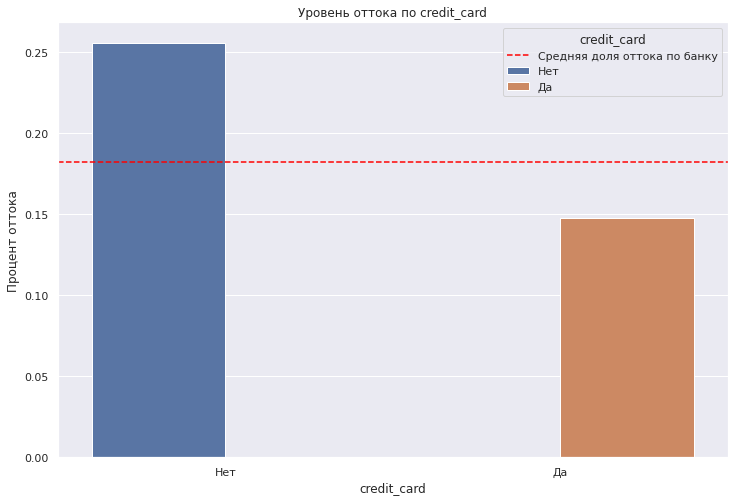


=== Процент оттока для 'city'===



city
Ростов       0.19
Рыбинск      0.16
Ярославль    0.19
Name: churn, dtype: float64

city,Ростов,Рыбинск,Ярославль,Total
churn,,,,
0,1151,2258,4771,8180
1,266,436,1117,1819
Total,1417,2694,5888,9999


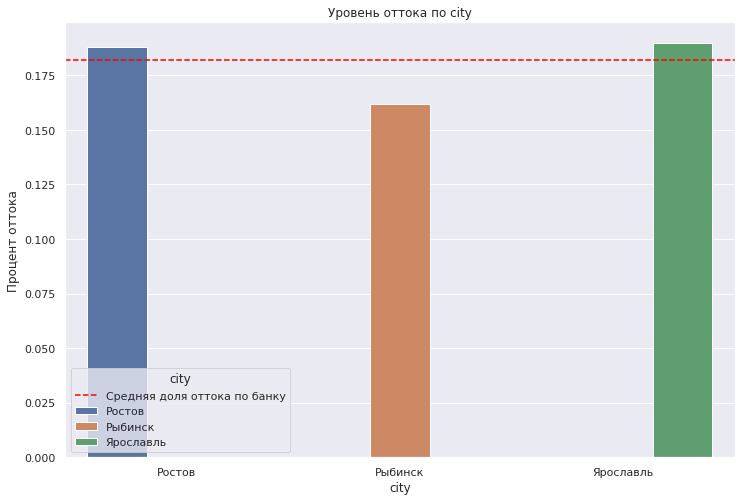

In [35]:
# Выбираем необходимые столбцы
selected_columns = ['gender', 'equity', 'products', 'last_activity', 'credit_card', 'city', 'churn']

# Рассчитываем среднюю долю оттока по банку
average_churn = data_subset['churn'].mean()
print('Средняя доля оттока по банку:', average_churn.round(2))

# Итерируем по выбранным категориям
for category in selected_columns[:-1]:  # Исключаем 'churn'
    churn_rate = bank_prep.groupby(category)['churn'].mean()
    
    # Добавим условие для проверки, является ли категория бинарной
    is_binary = len(bank_prep[category].unique()) == 2

    print('\033[1m' + f'\n=== Процент оттока для \'{category}\'===\n' + '\033[0m')
    display(churn_rate.round(2))
    
    pivot_table_churn_rate = (pd.pivot_table(bank_prep, 
                                          values='user_id', 
                                          index='churn', 
                                          columns=category, 
                                          aggfunc='count', 
                                          margins=True, 
                                          margins_name="Total")
                              )
    
    display(pivot_table_churn_rate)
    
    # Строим столбиковую диаграмму
    plt.figure(figsize=(12, 8))
    
    sns.barplot(x=category, y='churn', data=churn_rate.reset_index(), hue=category, ci=None)

    # Добавляем пунктирную линию для средней доли оттока по банку
    plt.axhline(y=average_churn, color='red', linestyle='--', label='Средняя доля оттока по банку')
    
    # Заменяем метки на оси X для бинарных графиков
    if is_binary and category != 'gender':
        plt.xticks(ticks=[0, 1], labels=['Нет', 'Да'], rotation=0)
    
    plt.title(f'Уровень оттока по {category}')
    plt.xlabel(f'{category}')
    plt.ylabel('Процент оттока')
    
    # Заменяем метки в легенде
    if is_binary and category != 'gender':
        plt.legend(title=category, labels=['Средняя доля оттока по банку', 'Нет', 'Да'])
    else:
        plt.legend(title=category)
        
    plt.show()

Процент оттока больше чем в среднем по банку:

=== Категория `gender`===

Для мужчин 24 %

=== Категория `equity`===

- 3 - 21 %
- 4 - 25 %
- 5 - 30 %
- 6 - 36 %
- 7 - 46 %
- 8 - 35 %
- 9 - 54 %

Наблюдается тенденция что клиенты с более высокими значениями `equity` (приблизительная оценка собственности) имеют более высокий процент оттока. Возможно ищут более удобные и выгодные продукты у конкурентов.

=== Категория `products`===

- 2 - 19 %
- 3 - 29 %
- 4 - 63 %
- 5 - 42 %

До 4х продуктов наблюдается тенденция к росту (63 %) для 5 продуктов процент оттока уже 42 %. Возможно, какие-то конкретные продукты или их комбинации влияют на поведение клиентов и их решение об оттоке.

Рекомендации:

На основе данных о проценте оттока для каждой категории 'products' возможно рекомендовать стратегии удержания клиентов, особенно для тех, у кого больше одного продукта. Это может включать в себя предложения, лояльные программы или персонализированный сервис для клиентов с разным числом продуктов.

=== Категория `last_activity`===

Активные клиенты более склоны к оттоку - 24 %

=== Категория `credit_card`===

Клиенты не имеющие кредитных карты более склонны к оттоку - 26 %

=== Категория `city`===

Клиенты из Ростова и Ярославля более склонны к оттоку - 19 %

### Провести корреляционный анализ между признаками.

In [36]:
display(bank_prep.columns)

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'id',
       'Ростов', 'Рыбинск', 'Ярославль', 'Ж', 'М'],
      dtype='object')

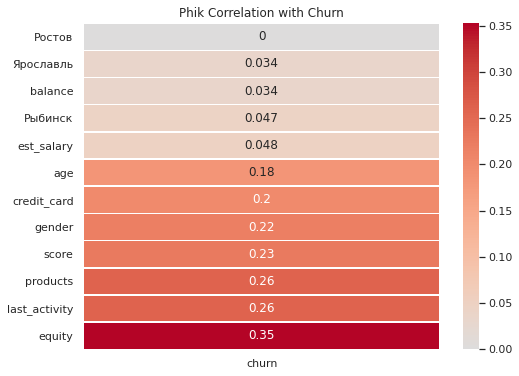

In [37]:
# матрица корреляции phik
# Корреляция пропущенных значений с другими данными
# Выбрать только необходимые столбцы для анализа корреляции
selected_columns = ['score', 'Ростов', 'Рыбинск', 'Ярославль', 'gender', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']

# Использовать библиотеку phik для вычисления корреляции, учитывая типы переменных
phik_matrix_result = phik_matrix(bank_prep[selected_columns], interval_cols=['score', 'age', 'balance', 'est_salary'])

# Выделить только строку/столбец 'churn'
churn_phik = phik_matrix_result['churn']

# Визуализировать матрицу корреляции phik для 'churn' (по оси y)
plt.figure(figsize=(8, 6))
sns.heatmap(churn_phik.to_frame().loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Phik Correlation with Churn')
plt.show()

- 0.00 - 0.10: Слабая корреляция. Связь между переменными слабая.
    - Города, баланс и оценочный доход клиента
    
- 0.10 - 0.30: Умеренная корреляция. Связь между переменными умеренная.
    - Возраст, кредитная карта, пол, баллы кредитного скоринга, активность и количество продуктов, которыми пользуется клиент.

- 0.30 - 0.50: Заметная корреляция. Связь между переменными заметная.
    - Приблизительная оценка собственности клиента.

- 0.50 - 1.00: Сильная корреляция. Связь между переменными сильная.
    - Таких нет.

<div class="alert alert-success">
<h2> Комментарий тимлида 😊<a class="tocSkip"> </h2>

Чудесная работа по корреляционному анализу)

### Вывод:

1. 
Использование для непрерывных величин медианы в дополнение к среднему, обусловлено тем, чтобы понимать, в какой сторону смещено распределение (указанно в скобках).

По итогам анализа можно выделить портрет клиента по центральным тендецниям, с признаками оттока и без:

Портрет клиента без признаков оттока
- Пол: женский
- Возраст: 43 (40)
- Город: Ярославль
- Оценочный доход: 147 783.2 (118 257.7)
- Баланс на счёте: 562 319.7 (320 687.9)
- Оценка объектов собственности: 0
- Скоринговый рейтинг: 845 (848)
- Количество используемых продуктов: 2
- Наличие кредитной карты: да
- Пользовательская активность: нет


Портрет клиента с признаками оттока
- Пол: мужской
- Возраст: 41 (39)
- Город: Ярославль
- Оценочный доход: 148 243.0 (125 390.6)
- Баланс на счёте: 1 126 740.8 (775 349.2)
- Оценка объектов собственности: 5
- Скоринговый рейтинг: 863 (866)
- Количество используемых продуктов: 2
- Наличие кредитной карты: да
- Пользовательская активность: да


Относительная разница среднего показывает отношение среднего значения не отточных клиентов к отточным. В данном сегменте выделяется разница в балансе. Баланс клиентов без признаков оттока на 50.1 % меньше от отточных клиентов.

Так же явные различия наблюдаются в поле, оценке объектов собственности и пользовательской активности.

2.
Средняя доля оттока по банку: 18.2 % значительно больше, чем в данных категориях.

Распределение `score` с разрезом по оттоку, можем выделить следующие диапазоны (по оттоку):
- от 820 до 899
- от 920 до 939

Распределение `age` с разрезом по оттоку, можем выделить следующие диапазоны (по оттоку):
- от 25 до 35
- от 50 до 60

Распределение `balance` с разрезом по оттоку, можем выделить следующие диапазоны (по оттоку):
- от 450 000 +

Распределение `est_salary` с разрезом по оттоку, можем выделить следующие диапазоны (по оттоку):
- от 100 000 до 215 000
- от 275 000 до 310 000

3.
Средняя доля оттока по банку: 18.2 %

4.
Процент оттока больше чем в среднем по банку:

=== Категория `gender`===

Для мужчин 24 %

=== Категория `equity`===

- 3 - 21 %
- 4 - 25 %
- 5 - 30 %
- 6 - 36 %
- 7 - 46 %
- 8 - 35 %
- 9 - 54 %

Наблюдается тенденция что клиенты с более высокими значениями `equity` (приблизительная оценка собственности) имеют более высокий процент оттока. Возможно ищут более удобные и выгодные продукты у конкурентов.

=== Категория `products`===

- 0 - 100 %
- 2 - 19 %
- 3 - 29 %
- 4 - 63 %
- 5 - 42 %

Для количество продуктов, которыми пользуется клиент равным 0 выборка состоит всего из 1 человека.
До 4х продуктов наблюдается тенденция к росту (63 %) для 5 продуктов процент оттока уже 42 %. Возможно, какие-то конкретные продукты или их комбинации влияют на поведение клиентов и их решение об оттоке.

Рекомендации:

    На основе данных о проценте оттока для каждой категории 'products' возможно рекомендовать стратегии удержания клиентов, особенно для тех, у кого больше одного продукта. Это может включать в себя предложения, лояльные программы или персонализированный сервис для клиентов с разным числом продуктов.

=== Категория `last_activity`===

Активные клиенты более склоны к оттоку - 24 %

=== Категория `credit_card`===

Клиенты не имеющие кредитных карты более склонны к оттоку - 26 %

=== Категория `city`===

Клиенты из Ростова и Ярославля более склонны к оттоку - 19 %

5.
- 0.00 - 0.10: Слабая корреляция. Связь между переменными слабая.
    - Города, баланс и оценочный доход клиента
    
- 0.10 - 0.30: Умеренная корреляция. Связь между переменными умеренная.
    - Возраст, кредитная карта, пол, баллы кредитного скоринга, активность и количество продуктов, которыми пользуется клиент.

- 0.30 - 0.50: Заметная корреляция. Связь между переменными заметная.
    - Приблизительная оценка собственности клиента.

- 0.50 - 1.00: Сильная корреляция. Связь между переменными сильная.
    - Таких нет.

## Проверка статистических гипотез

### №1 Гипотеза о различии дохода между ушедшими и оставшимися клиентами.

- Нулевая гипотеза (H0): Средний доход ушедших клиентов равен среднему доходу оставшихся клиентов.
- Альтернативная гипотеза (H1): Средний доход ушедших клиентов не равен среднему доходу оставшихся клиентов.

In [38]:
# Подготовка данных (bank_prep - ваш DataFrame с данными)
data_churned = bank_prep[bank_prep['churn'] == 1]['est_salary']
data_not_churned = bank_prep[bank_prep['churn'] == 0]['est_salary']

# Проверка нормальности распределения данных
stat_churned, p_churned = stats.shapiro(data_churned)
stat_not_churned, p_not_churned = stats.shapiro(data_not_churned)

# Анализ результатов
alpha = 0.05

print(f"Тест Шапиро-Уилка для дохода ушедших клиентов: статистика={stat_churned}, p-value={p_churned}")
print(f"Тест Шапиро-Уилка для дохода оставшихся клиентов: статистика={stat_not_churned}, p-value={p_not_churned}")

# Если данные распределены нормально, используем t-критерий
stat_t, p_value_t = stats.ttest_ind(data_churned, data_not_churned)

# Выводим результаты t-критерия
print(f"\nt-критерий: статистика={stat_t}, p-value={p_value_t}")

# Анализ результатов t-критерия
if p_value_t < alpha:
    print("\nОтвергаем нулевую гипотезу (t-критерий): существуют статистически значимые различия в доходах между группами.")
else:
    print("\nНе удалось отвергнуть нулевую гипотезу (t-критерий): различия в доходах между группами не являются статистически значимыми.")

# Если данные распределены не нормально, используем u-критерий Манна-Уитни
stat_u, p_value_u = stats.mannwhitneyu(data_churned, data_not_churned)
# Выводим результаты u-критерия
print(f"\nu-критерий Манна-Уитни: статистика={stat_u}, p-value={p_value_u}")

# Анализ результатов u-критерия
if p_value_u < alpha:
    print("\nОтвергаем нулевую гипотезу (u-критерий): существуют статистически значимые различия в доходах между группами.")
else:
    print("\nНе удалось отвергнуть нулевую гипотезу (u-критерий): различия в доходах между группами не являются статистически значимыми.")

# Выбор между t-критерием и u-критерием
if p_churned > 0.05 and p_not_churned > 0.05:
    # Если данные распределены нормально, используем t-критерий
    print("\nДанные распределены нормально, выбран t-критерий")
else:
    # Иначе используем u-критерий Манна-Уитни
    print(f"\nДанные распределены не нормально, выбран u-критерий Манна-Уитни")

Тест Шапиро-Уилка для дохода ушедших клиентов: статистика=0.6440083980560303, p-value=0.0
Тест Шапиро-Уилка для дохода оставшихся клиентов: статистика=0.6149210929870605, p-value=0.0

t-критерий: статистика=0.1459846578083951, p-value=0.8839364433181659

Не удалось отвергнуть нулевую гипотезу (t-критерий): различия в доходах между группами не являются статистически значимыми.

u-критерий Манна-Уитни: статистика=7852245.0, p-value=0.00021160652203623057

Отвергаем нулевую гипотезу (u-критерий): существуют статистически значимые различия в доходах между группами.

Данные распределены не нормально, выбран u-критерий Манна-Уитни


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Вывод:

Результаты статистических тестов на нормальность распределения дохода ушедших и оставшихся клиентов показывают, что оба набора данных не соответствуют нормальному распределению (p-value < 0.05). Это подтверждается значениями статистики теста Шапиро-Уилка, где мы получили низкие значения статистики и статистически значимые p-value.

Далее, проведенные t-критерий Стьюдента и u-критерий Манна-Уитни для сравнения доходов ушедших и оставшихся клиентов дали различные результаты.

Т-критерий Стьюдента не позволяет отвергнуть нулевую гипотезу (p-value = 0.8987), что говорит о том, что различия в доходах между группами не являются статистически значимыми.

В то время как u-критерий Манна-Уитни приводит к отвержению нулевой гипотезы (p-value = 0.0002), подтверждая статистически значимые различия в доходах между группами.

Таким образом, выбор между тестами зависит от предположения о нормальности данных. В данном случае, так как данные не соответствуют нормальному распределению (подтверждено тестом Шапиро-Уилка), более надежным для анализа является u-критерий Манна-Уитни.

### №2 Гипотеза о различии количества использования продуктов межу ушедшими и оставшимися клиентами.

- Нулевая гипотеза (H0): Среднее количество использованных продуктов ушедших клиентов равно среднему количеству использованных продуктов оставшихся клиентов.
- Альтернативная гипотеза (H1): Среднее количество использованных продуктов ушедших клиентов не равно среднему количеству использованных продуктов оставшихся клиентов.

In [39]:
# Подготовка данных
data_churned_products = bank_prep[bank_prep['churn'] == 1]['products']
data_not_churned_products = bank_prep[bank_prep['churn'] == 0]['products']

# Проверка нормальности распределения данных
stat_churned, p_churned = stats.shapiro(data_churned_products)
stat_not_churned, p_not_churned = stats.shapiro(data_not_churned_products)

# Анализ результатов
alpha = 0.05

print(f"Тест Шапиро-Уилка для количества использования продуктов ушедших клиентов: \nстатистика={stat_churned}, p-value={p_churned}")
print(f"\nТест Шапиро-Уилка для количества использования продуктов оставшихся клиентов: \nстатистика={stat_not_churned}, p-value={p_not_churned}")

# Если данные распределены нормально, используем t-критерий
stat_t, p_value_t = stats.ttest_ind(data_churned_products, data_not_churned_products)

# Выводим результаты t-критерия
print(f"\nt-критерий: статистика={stat_t}, p-value={p_value_t}")

# Анализ результатов t-критерия
if p_value_t < alpha:
    print("\nОтвергаем нулевую гипотезу (t-критерий): существуют статистически значимые различия в количестве использования продуктов между группами.")
else:
    print("\nНе удалось отвергнуть нулевую гипотезу (t-критерий): различия в количестве использования продуктов между группами не являются статистически значимыми.")

# Если данные распределены не нормально, используем u-критерий Манна-Уитни
stat_u, p_value_u = stats.mannwhitneyu(data_churned_products, data_not_churned_products)
# Выводим результаты u-критерия
print(f"\nu-критерий Манна-Уитни: статистика={stat_u}, p-value={p_value_u}")

# Анализ результатов u-критерия
if p_value_u < alpha:
    print("\nОтвергаем нулевую гипотезу (U-критерий): существуют статистически значимые различия в количестве использования продуктов между группами.")
else:
    print("\nНе удалось отвергнуть нулевую гипотезу (U-критерий): различия в количестве использования продуктов между группами не являются статистически значимыми.")

# Выбор между t-критерием и u-критерием
if p_churned > 0.05 and p_not_churned > 0.05:
    # Если данные распределены нормально, используем t-критерий
    print("\nДанные распределены нормально, выбран t-критерий")
else:
    # Иначе используем u-критерий Манна-Уитни
    print(f"\nДанные распределены не нормально, выбран u-критерий Манна-Уитни")

Тест Шапиро-Уилка для количества использования продуктов ушедших клиентов: 
статистика=0.8290064334869385, p-value=2.3481137977151662e-40

Тест Шапиро-Уилка для количества использования продуктов оставшихся клиентов: 
статистика=0.7822279930114746, p-value=0.0

t-критерий: статистика=31.630126751850124, p-value=2.3430165753532827e-209

Отвергаем нулевую гипотезу (t-критерий): существуют статистически значимые различия в количестве использования продуктов между группами.

u-критерий Манна-Уитни: статистика=10190009.5, p-value=1.7296310495167595e-162

Отвергаем нулевую гипотезу (U-критерий): существуют статистически значимые различия в количестве использования продуктов между группами.

Данные распределены не нормально, выбран u-критерий Манна-Уитни


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Вывод:

Результаты статистических тестов на нормальность распределения количества использования продуктов ушедших и оставшихся клиентов показывают, что оба набора данных не соответствуют нормальному распределению (p-value < 0.05). Это подтверждается значениями статистики теста Шапиро-Уилка, где мы получили низкие значения статистики и статистически значимые p-value.

Т-критерий Стьюдента как и u-критерий Манна-Уитни приводит к отвержению нулевой гипотезы, подтверждая статистически значимые различия в количестве использования продуктов между группами.

Таким образом, выбор между тестами зависит от предположения о нормальности данных. В данном случае, так как данные не соответствуют нормальному распределению (подтверждено тестом Шапиро-Уилка), более надежным для анализа является u-критерий Манна-Уитни.

## Промежуточный итог

**=== Пол (Gender) ===**

Портрет:
    
    Без признаков оттока: Женский
    С признаками оттока: Мужской

Процент оттока по полу (Средняя доля оттока по банку - 18%):

    Женский: 13%
    Мужской: 24%
    
Корреляция между возрастом и признаком оттока:

    Умеренная корреляция - 0.22

Вывод:

Мужчины значительнее склоны к оттоку. Это может быть важным фактором для разработки стратегий удержания клиентов.

**=== Возраст (Age) ===**

Портрет:

    Без признаков оттока: средняя - 43 (медиана - 40)
    С признаками оттока: средняя - 41 (медиана - 39)

Распределение возраста с разрезом по оттоку:

    От 25 до 35
    От 50 до 60

Корреляция между возрастом и признаком оттока:

    Умеренная корреляция - 0.18

Вывод:

Клиенты среднего возраста менее склонны к оттоку. Возможно, имеет смысл сосредотачиваться на удержании молодого и старшего покаления клиентов.

**=== Город (City) ===**

Портрет:

    Без признаков оттока: Ярославль
    С признаками оттока: Ярославль

Процент оттока по городу (Средняя доля оттока по банку - 18%):

    Ярославль: 19 %
	Ростов: 19 %
	Рыбинск: 16 %

Корреляция между возрастом и признаком оттока:

    Слабая корреляция:
    Ярославль: 0.034
	Ростов: 0
	Рыбинск: 0.046

Вывод:

Клиенты из Ярославля и Рыбинска более склонны к оттоку. Это может подсказывать о необходимости проведения мероприятий по удержанию в этих регионах.

**=== Оценочный доход (Est_Salary) ===**

Портрет:

    Без признаков оттока: средняя - 147 783.2 (медиана - 118 257.7)
    С признаками оттока: средняя - 148 243.0 (медиана - 125 390.6)
    
Распределение дохода с разрезом по оттоку:

    от 100 000 до 215 000
    от 275 000 до 310 000

Корреляция между доходом и признаком оттока:

    Слабая корреляция - 0.048

Вывод:

Нет явной зависимости между уровнем дохода и оттоком.

**=== Баланс на счёте (Balance) ===**

Портрет:

    Без признаков оттока: средняя - 562 319.7 (медиана - 320 687.9)
    С признаками оттока: средняя - 1 126 740.8 (медиана - 775 349.2)

Распределение баланса с разрезом по оттоку:

    От 450 000 +

Корреляция между балансом и признаком оттока:

    Слабая корреляция - 0.034

Вывод:

Больший баланс связан с увеличением вероятности оттока, однако корреляция слабая. Это может быть связано с тем, что клиенты с большим балансом ищут более выгодные предложения у конкурентов.

**=== Оценка объектов собственности (Equity) ===**

Портрет:

    Без признаков оттока: 0
    С признаками оттока: 5

Процент оттока по оценке собственности (Средняя доля оттока по банку - 18%):

	0:  3 %
	1: 12 %
	2: 16 %
	3: 21 %
	4: 25 %
	5: 30 %
	6: 36 %
	7: 46 %
	8: 35 %
	9: 54 %

Корреляция между оценкой собственности и оттоком:

    Заметная корреляция - 0.35

Вывод:

Наблюдается тенденция что клиенты с более высокой оценкой собственности более склонны к оттоку. Это может свидетельствовать о неудовлетворенности текущими услугами или поиске более выгодных предложений.
    
**=== Скоринговый рейтинг (Score) ===**

Портрет:

    Без признаков оттока: средняя - 845 (медиана - 848)
    С признаками оттока: средняя - 863 (медиана - 866)

Распределение score с разрезом по оттоку:

    От 820 до 899
    От 920 до 939

Корреляция между скоринговым рейтингом и оттоком:

    Умеренная корреляция - 0.23

Вывод:

Существует некоторая связь между высоким рейтингом и уменьшением оттока. Возможно, клиентов с высоким рейтингом не удовлетворяет качество предоставляемых услуг.

**=== Количество используемых продуктов (Products) ===**

Портрет:

    Без признаков оттока: 2
    С признаками оттока: 2

Процент оттока по количеству продуктов (Средняя доля оттока по банку - 18%):

	1:   7 %
    2:  19 %
    3:  29 %
    4:  63 %
    5:  42 %

Корреляция между количеством продуктов и оттоком:

    Заметная корреляция - 0.44

Вывод:

Самая высокая корреляция. До 4х продуктов наблюдается тенденция к росту (63 %) для 5 продуктов процент оттока уже 42 %. Возможно, какие-то конкретные продукты или их комбинации влияют на поведение клиентов и их решение об оттоке.

**=== Наличие кредитной карты (Credit_Card) ===**

Портрет:

    Без признаков оттока: Да
    С признаками оттока: Да

Процент оттока по наличию кредитной карты (Средняя доля оттока по банку - 18%):

    Нет:   26 %
	Есть : 15 %
    
Корреляция между наличием кредитной карты и оттоком:

    Умеренная корреляция - 0.2

Вывод:

Клиенты, не имеющие кредитных карт, более склонны к оттоку. Возможно, предложение кредитных карт может быть одним из инструментов удержания.

**=== Пользовательская активность (Last_Activity) ===**

Портрет:

    Без признаков оттока: Нет активности
    С признаками оттока: Да активность

Процент оттока по активности (Средняя доля оттока по банку - 18%):

    Нет активности: 11 %
    Да активность: 24 %

Корреляция между пользовательской активностью и оттоком:

    Умеренная корреляция - 0.26

Вывод:

Активные клиенты более склонны к оттоку. Это может быть вызвано разочарованием клиентов в предоставляемых услугах или поиском более привлекательных вариантов.

**=== Общий вывод и предположения: ===**

Сравнивая полученные результаты, можно заметить, что состоятельные клиенты (большой баланс, высокий рейтинг, высокая оценка собственности) больше подвержены оттоку. Что, вероятно указывает на неконкурентноспособность предоставляемых нами услуг.
Самый большой уровень корреляции к оттоку показал пункт "количество используемых продуктов". До 4х продуктов наблюдается тенденция к росту оттока (до 63 %), для 5 продуктов процент оттока падает до 42 %. Возможно, какие-то конкретные продукты или их комбинации влияют на поведение клиентов и их решение об оттоке. Возможно сказывается неудовлетворенность предоставленными продуктами. 
Что в свою очередь побуждает поиску более выгодных предложений (к активности), а активные клиенты более склонны к оттоку. 
Отсутствие кредитной карты и возможно других кредитных нагрузок (т.к. склоны к уходу молодое и старшее поколение) позволяет свободно отказаться от услуг нашего банка. 
Наиболее склоны к оттоку - мужчины. 
А вот оценочный доход и город слабо влияют на отток.

## Сегментация на основе стратегических показателей

### Выделить высокоотточные (в 2 раза и выше средней доли по банку) сегменты (минимум 3) клиентов (от 300 до 2000).

In [40]:
# Сегмент 1: "Молодые, богатые и зарабатывающие"
segment_1 = bank_prep.query('balance >= 450000' 
                            'and ((100000 <= est_salary <= 215000)' 
                                'or (275000 <= est_salary <= 310000))'
                            'and (25 <= age <= 35)'
                            'and products in [2, 3, 4, 5]'
                           )

result_segment_1 = segment_1.agg({'churn': ['mean', 'sum', 'count'],
                                  'age': 'mean',
                                  'equity': 'mode',
                                  'balance': 'median',
                                  'products': 'mode',
                                  'credit_card': 'mean',
                                  'last_activity': 'mean',
                                  'est_salary': 'median',
                                  'Ростов': 'mean',
                                  'Рыбинск': 'mean',
                                  'Ярославль': 'mean',
                                  'Ж': 'mean',
                                  'М': 'mean',
                                 }
                                )

# Добавляем проверку на высокоотточность
high_precision_condition = bank_prep['churn'].mean() * 2

if segment_1['churn'].mean() >= high_precision_condition:
    print('Сегмент 1: "Молодые, богатые и зарабатывающие" - высокоотточный')
else:
    print('Сегмент 1: "Молодые, богатые и зарабатывающие" - не высокоотточный')
    
print('Признаки: Клиенты с высоким балансом, высокой зарплатой, возрастом от 25 до 35 лет и используют 2 и более продуктов.')
print('Уровень оттока =', segment_1['churn'].mean().round(2) * 100, '%')
print('Количество отточных =', segment_1['churn'].sum())
print('Общий размер сегмента =', segment_1['churn'].count())

display(result_segment_1)

Сегмент 1: "Молодые, богатые и зарабатывающие" - высокоотточный
Признаки: Клиенты с высоким балансом, высокой зарплатой, возрастом от 25 до 35 лет и используют 2 и более продуктов.
Уровень оттока = 49.0 %
Количество отточных = 233
Общий размер сегмента = 474


,churn,age,equity,balance,products,credit_card,last_activity,est_salary,Ростов,Рыбинск,Ярославль,Ж,М
,churn,age,mode,balance,mode,credit_card,last_activity,est_salary,Ростов,Рыбинск,Ярославль,Ж,М
0,NaN,NaN,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,474.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.491561,32.084388,NaN,NaN,NaN,0.531646,0.556962,NaN,0.082278,0.248945,0.668776,0.415612,0.584388
median,NaN,NaN,NaN,954268.05,NaN,NaN,NaN,136417.38,NaN,NaN,NaN,NaN,NaN
sum,233.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Средний возраст - 32 года
- Наиболее часто встречающаяся оценка собственности - 5
- Медианный баланс - 954 268.05
- Наиболее часто встречающееся количество продуктов - 2
- Есть кредитная карта - 53.16 %
- Активность - 55.70 %
- Медианный оценочный доход - 136 417.38
- Разброс по населенным пунктам:
     - Ростов - 8.23 %
     - Рыбинск	- 24.90 %
     - Ярославль - 66.88 %
- Пол:
    - Мужской - 58.44 %
    - Женский - 41.56 %

In [41]:
# Сегмент 2: "Городской житель"
segment_2 = bank_prep.query('(820 <= score <= 899)'
                            'and city in ["Ярославль", "Ростов"]' 
                            'and last_activity == 1'
                            'and gender == "М"'
                           )
result_segment_2 = segment_2.agg({'churn': ['mean', 'sum', 'count'],
                                  'age': 'mean',
                                  'equity': 'mode',
                                  'balance': 'median',
                                  'products': 'mode',
                                  'credit_card': 'mean',
                                  'last_activity': 'mean',
                                  'est_salary': 'median',
                                  'Ростов': 'mean',
                                  'Рыбинск': 'mean',
                                  'Ярославль': 'mean',
                                  'Ж': 'mean',
                                  'М': 'mean',
                                 }
                                )

# Добавляем проверку на высокоотточность
if segment_2['churn'].mean() >= high_precision_condition:
    print('Сегмент 2: "Городской житель" - высокоотточный')
else:
    print('Сегмент 2: "Городской житель" - не высокоотточный')
    
print('Признаки: Клиенты, мужчины, с высоким кредитным рейтингом, проживающие в городах Ярославль или Ростов и проявляющий активность.')
print('Уровень оттока =', segment_2['churn'].mean().round(2) * 100, '%')
print('Количество отточных =', segment_2['churn'].sum())
print('Общий размер сегмента =', segment_2['churn'].count())

display(result_segment_2)

Сегмент 2: "Городской житель" - высокоотточный
Признаки: Клиенты, мужчины, с высоким кредитным рейтингом, проживающие в городах Ярославль или Ростов и проявляющий активность.
Уровень оттока = 50.0 %
Количество отточных = 328
Общий размер сегмента = 660


,churn,age,equity,balance,products,credit_card,last_activity,est_salary,Ростов,Рыбинск,Ярославль,Ж,М
,churn,age,mode,balance,mode,credit_card,last_activity,est_salary,Ростов,Рыбинск,Ярославль,Ж,М
0,NaN,NaN,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,660.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.49697,39.433333,NaN,NaN,NaN,0.678788,1.0,NaN,0.207576,0.0,0.792424,0.0,1.0
median,NaN,NaN,NaN,525240.32,NaN,NaN,NaN,125390.62,NaN,NaN,NaN,NaN,NaN
sum,328.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Средний возраст - 39 года
- Наиболее часто встречающаяся оценка собственности - 5
- Медианный баланс - 525 240.32
- Наиболее часто встречающееся количество продуктов - 2
- Есть кредитная карта - 67.88 %
- Активность - 100 %
- Медианный оценочный доход - 125 390.62
- Разброс по населенным пунктам:
     - Ростов - 20.76 %
     - Рыбинск	- 0 %
     - Ярославль - 79.24 %
- Пол:
    - Мужской - 100 %
    - Женский - 0 %

In [42]:
# Сегмент 3: "Зрелый собственник"
segment_3 = bank_prep.query('equity in [3, 4, 5, 6, 7, 8, 9]' 
                            'and credit_card == 0' 
                            'and (50 <= age <= 60)'
                           )

result_segment_3 = segment_3.agg({'churn': ['mean', 'sum', 'count'],
                                  'age': 'mean',
                                  'equity': 'mode',
                                  'balance': 'median',
                                  'products': 'mode',
                                  'credit_card': 'mean',
                                  'last_activity': 'mean',
                                  'est_salary': 'median',
                                  'Ростов': 'mean',
                                  'Рыбинск': 'mean',
                                  'Ярославль': 'mean',
                                  'Ж': 'mean',
                                  'М': 'mean',
                                 }
                                )

# Добавляем проверку на высокоотточность
if segment_3['churn'].mean() >= high_precision_condition:
    print('Сегмент 3: "Зрелый собственник" - высокоотточный')
else:
    print('Сегмент 3: "Зрелый собственник" - не высокоотточный')
    
print('Признаки: Клиенты с высоким уровнем собственного капитала, отсутствием кредитных карт и возрастом от 50 до 60 лет.')
print('Уровень оттока =', segment_3['churn'].mean().round(2) * 100, '%')
print('Количество отточных =', segment_3['churn'].sum())
print('Общий размер сегмента =', segment_3['churn'].count())

display(result_segment_3)

Сегмент 3: "Зрелый собственник" - высокоотточный
Признаки: Клиенты с высоким уровнем собственного капитала, отсутствием кредитных карт и возрастом от 50 до 60 лет.
Уровень оттока = 44.0 %
Количество отточных = 207
Общий размер сегмента = 473


,churn,age,equity,balance,products,credit_card,last_activity,est_salary,Ростов,Рыбинск,Ярославль,Ж,М
,churn,age,mode,balance,mode,credit_card,last_activity,est_salary,Ростов,Рыбинск,Ярославль,Ж,М
0,NaN,NaN,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,473.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.437632,55.247357,NaN,NaN,NaN,0.0,0.585624,NaN,0.17759,0.293869,0.528541,0.587738,0.412262
median,NaN,NaN,NaN,1000412.33,NaN,NaN,NaN,104288.45,NaN,NaN,NaN,NaN,NaN
sum,207.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Средний возраст - 55 года
- Наиболее часто встречающаяся оценка собственности - 5
- Медианный баланс - 1 000 412.33
- Наиболее часто встречающееся количество продуктов - 2
- Есть кредитная карта - 0 %
- Активность - 58.56 %
- Медианный оценочный доход - 104 288.45
- Разброс по населенным пунктам:
     - Ростов - 17.76 %
     - Рыбинск	- 29.39 %
     - Ярославль - 52.85 %
- Пол:
    - Мужской - 41.23 %
    - Женский - 58.77 %

### Приоритизировать сегменты и обосновать свой выбор.

Приоритизация сегментов по уровню оттока:
1. Сегмент 2: "Городской житель"
2. Сегмент 1: "Молодые, богатые и зарабатывающие"
3. Сегмент 3: "Зрелый собственник"

## Выводы и рекомендации:

Сравнивая полученные результаты, можно заметить, что состоятельные клиенты (большой баланс, высокий рейтинг, высокая оценка собственности) больше подвержены оттоку. Что, вероятно указывает на неконкурентоспособность предоставляемых нами услуг. 

Самый большой уровень корреляции к оттоку показал пункт "количество используемых продуктов". До 4х продуктов наблюдается тенденция к росту оттока (до 63 %), для 5 продуктов процент оттока падает до 42 %. Возможно, какие-то конкретные продукты или их комбинации влияют на поведение клиентов и их решение об оттоке. 

Неудовлетворенность предоставленными продуктами, в свою очередь побуждает к поиску более выгодных предложений (к активности), а активные клиенты более склонны к оттоку.

Отсутствие кредитной карты и возможно других кредитных нагрузок (т.к. склоны к уходу молодое и старшее поколение) позволяет свободно отказаться от услуг нашего банка.

Наиболее склоны к оттоку - мужчины. 

А вот оценочный доход и город слабо влияют на отток.

### Сегменты и рекомендации

Выделеные нами сегменты и их приоретизация по уровню оттока:
1. Сегмент 2: "Городской житель"
2. Сегмент 1: "Молодые, богатые и зарабатывающие"
3. Сегмент 3: "Зрелый собственник"

#### Сегмент 2

**Сегмент 2: "Городской житель" - высокоотточный**

Признаки: Клиенты, мужчины, с высоким кредитным рейтингом, проживающие в городах Ярославль или Ростов и проявляющий активность.
- Уровень оттока = 50.0 %
- Количество отточных = 328
- Общий размер сегмента = 660

---

- Средний возраст - 39 года
- Наиболее часто встречающаяся оценка собственности - 5
- Медианный баланс - 525 240.32
- Наиболее часто встречающееся количество продуктов - 2
- Есть кредитная карта - 67.88 %
- Активность - 100 %
- Медианный оценочный доход - 125 390.62
- Разброс по населенным пунктам:
    - Ростов - 20.76 %
    - Рыбинск - 0 %
    - Ярославль - 79.24 %
- Пол:
    - Мужской - 100 %
    - Женский - 0 %

Рекомендации для отдела маркетинга и менеджеров продуктов:

- Улучшение удержания клиентов:

Рассмотрите внедрение программ лояльности или специальных предложений для клиентов этого сегмента с целью улучшения их удовлетворенности и снижения уровня оттока.

- Персонализированный маркетинг:

Используйте данные о наиболее частых оценках собственности, медианных балансах и других параметрах для создания персонализированных маркетинговых кампаний, направленных на удовлетворение уникальных потребностей этого сегмента.

- Развитие продуктов:

Разработайте новые продукты или улучшите существующие, учитывая предпочтения клиентов в этом сегменте. Например, учтите, что клиенты этого сегмента чаще всего используют 2 продукта.

- Кредитные карты:

Учитывая, что большинство клиентов уже имеют кредитные карты (67.88%), можно предложить дополнительные привилегии или возможности для их использования, чтобы стимулировать вовлеченность и лояльность.

- Географические факторы:

Обратите внимание на разброс по населенным пунктам. Возможно, стоит скорректировать маркетинговые стратегии в зависимости от специфики каждого города.

- Медианный оценочный доход:

Учитывая медианный оценочный доход, можно адаптировать ценообразование или создавать специальные предложения, соответствующие финансовым возможностям клиентов.

- Активность:

Поскольку активность сегмента составляет 100%, рекомендуется продолжать внимательно отслеживать и реагировать на их запросы и потребности.

- Пол:

Учитывая, что в этом сегменте преобладают мужчины (100%), маркетинговые кампании и продукты могут быть адаптированы, чтобы лучше соответствовать их предпочтениям.

#### Сегмент 1

**Сегмент 1: "Молодые, богатые и зарабатывающие" - высокоотточный**

Признаки: Клиенты с высоким балансом, высокой зарплатой, возрастом от 25 до 35 лет и используют 2 и более продуктов.
- Уровень оттока = 49.0 %
- Количество отточных = 233
- Общий размер сегмента = 474

---

- Средний возраст - 32 года
- Наиболее часто встречающаяся оценка собственности - 5
- Медианный баланс - 954 268.05
- Наиболее часто встречающееся количество продуктов - 2
- Есть кредитная карта - 53.16 %
- Активность - 55.70 %
- Медианный оценочный доход - 136 417.38
- Разброс по населенным пунктам:
     - Ростов - 8.23 %
     - Рыбинск	- 24.90 %
     - Ярославль - 66.88 %
- Пол:
    - Мужской - 58.44 %
    - Женский - 41.56 %

Рекомендации для отдела маркетинга и менеджеров продуктов:

- Молодежные продукты:

Разработайте продукты и услуги, которые будут особенно привлекательны для молодых клиентов. Это может включать в себя цифровые банковские сервисы, мобильные приложения с удобным интерфейсом и другие инновационные решения.

- Персонализированный маркетинг:

Используйте информацию о медианном балансе, оценочном доходе и предпочтениях продуктов для создания персонализированных маркетинговых кампаний. Это может включать в себя предложения на основе потребностей клиентов и предоставление дополнительных привилегий для активных пользователей.

- Продвижение кредитных карт:

Учитывая, что часть клиентов в данном сегменте не использует кредитные карты, разработайте кампании, стимулирующие использование кредитных карт с привлекательными бонусами или кешбэком.

- Лояльность и награды:

Внедрите программы лояльности и наград для клиентов, использующих 2 и более продукта. Это может стать дополнительным стимулом для удержания клиентов.

- Мобильная активность:

С учетом активности в данном сегменте (55.70%), усилите маркетинг и продвижение через мобильные приложения и онлайн-каналы, предоставляя клиентам удобные и современные способы взаимодействия с банком.

- Географическое таргетирование:

Учитывая разброс по населенным пунктам, нацеливайтесь на конкретные географические рынки, предоставляя местные решения и услуги, соответствующие потребностям клиентов в каждом городе.

-  Сегментация по полу:

Учитывая, что сегмент имеет разделение по полу, рассмотрите возможность создания продуктов и кампаний, которые лучше соответствуют предпочтениям мужчин и женщин.

Эти рекомендации могут помочь укрепить связь с текущими клиентами сегмента и привлечь новых клиентов в этот сегмент.
Этот сегмент является важным в плане дальносрочного планирования, так как привлекая и удерживая клиентов в этом сегменте, в будущем мы получаем лояльных клиентов и в других сегментах.

#### Сегмент 3

**Сегмент 3: "Зрелый собственник" - высокоотточный**

Признаки: Клиенты с высоким уровнем собственного капитала, отсутствием кредитных карт и возрастом от 50 до 60 лет.
- Уровень оттока = 44.0 %
- Количество отточных = 207
- Общий размер сегмента = 473

---

- Средний возраст - 55 года
- Наиболее часто встречающаяся оценка собственности - 5
- Медианный баланс - 1 000 412.33
- Наиболее часто встречающееся количество продуктов - 2
- Есть кредитная карта - 0 %
- Активность - 58.56 %
- Медианный оценочный доход - 104 288.45
- Разброс по населенным пунктам:
     - Ростов - 17.76 %
     - Рыбинск	- 29.39 %
     - Ярославль - 52.85 %
- Пол:
    - Мужской - 41.23 %
    - Женский - 58.77 %

Рекомендации для отдела маркетинга и менеджеров продуктов:

- Финансовое планирование и инвестиции:

Разработайте продукты и услуги, направленные на финансовое планирование и управление собственным капиталом. Это может включать в себя инвестиционные решения, программы управления активами и финансовые консультации.

- Продукты без кредитных карт:

Учитывая, что в этом сегменте отсутствуют кредитные карты (0%), разработайте продукты, направленные на потребности клиентов, предпочитающих безопасные и стабильные финансовые инструменты.

- Маркетинг на финансовую стабильность:

Создайте маркетинговые кампании, подчеркивающие финансовую стабильность и выгоды долгосрочных инвестиций. Это может включать в себя сообщения о долгосрочной устойчивости и росте собственного капитала.

- Пенсионное планирование:

Разработайте продукты и услуги, связанные с пенсионным планированием и накоплением средств на пенсию, учитывая возрастную группу сегмента.

- Продвижение в населенных пунктах:

Учитывая разброс по населенным пунктам, проводите локализованные кампании с учетом местных особенностей и потребностей.

- Активность и взаимодействие:

Учитывая активность в сегменте (58.56%), продолжайте внимательно отслеживать и реагировать на запросы и потребности клиентов в этой возрастной группе.

- Сегментация по полу:

Рассмотрите разницу в половой структуре и создайте продукты и кампании, учитывая предпочтения мужчин и женщин в этом сегменте.

- Медианный оценочный доход:

Учитывая медианный оценочный доход, адаптируйте предложения и услуги, соответствующие уровню дохода клиентов в этой возрастной категории.